In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tsshapelet import Shapelet

c:\Users\zqw93\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


## Vector

In [3]:
def vector_accer(csv):
    """
    This is a method to read the csv file and calculate the vector of x, y and z direction

    :csv: relative file address
    :return: dataframe of vector value
    """
    df_action = pd.read_csv(csv, skiprows = lambda x: x<=9, index_col=False)
    df_action['vm'] = (df_action['Accelerometer X']**2 + df_action['Accelerometer Y']**2 + df_action['Accelerometer Z']**2)**.5
    return df_action

# Jump
z_jump = vector_accer("zqw\zqwjumpRAW.csv")['vm'][250:1800]
g_jump = vector_accer("gbq\gbqjump.csv")['vm'][100:1800]

# Walk
z_walk = vector_accer("zqw\zqwwalkRAW.csv")['vm'][0: 5400]
g_walk = vector_accer("gbq\gbqwalk.csv")['vm'][300: 5000]

# skip
z_skip = vector_accer("zqw\zqwskipRAW.csv")['vm'][0: 2700]
g_skip = vector_accer("gbq\gbqskip.csv")['vm'][150: 1750]



## Plot

In [4]:
def plot_candidates(plot_name, df1, name1, df2, name2):
    """
    This is a method to plot candidtaes accelerometer time series data

    :plot_name: a string, plot title
    :df1: a dataframe, first candidate data
    :name1: a string, first candidate name
    :df2: a dataframe, second candidate data
    :name2: a string, second candidate name
    """
    plt.figure(figsize=(8, 6))
    ax_1 = df1.plot(label= name1)
    ax_2 = df2.plot(label=name2)
    for ax in (ax_1, ax_2) :
        ax.set_xlabel('data point')
        ax.set_ylabel('accer')
        ax.set_title(plot_name)
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    # Show the plot
    plt.show()


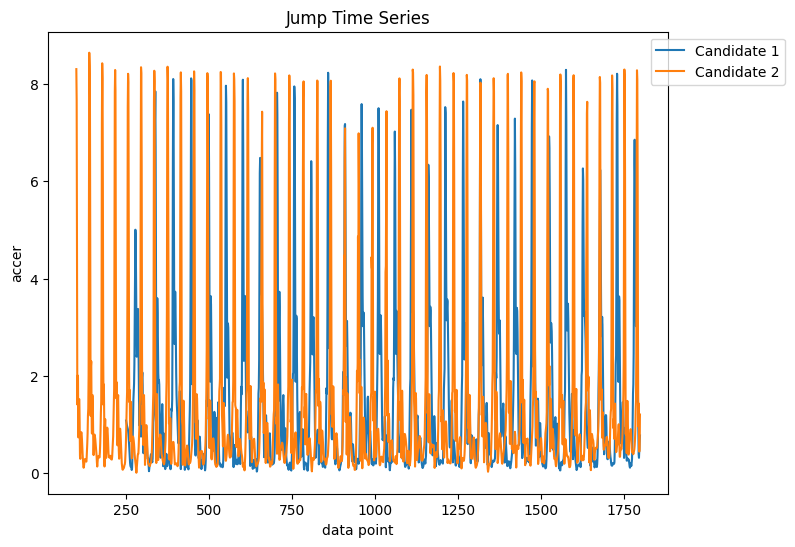

In [5]:
# Jump
plot_candidates('Jump Time Series', z_jump , 'Candidate 1', g_jump, 'Candidate 2')

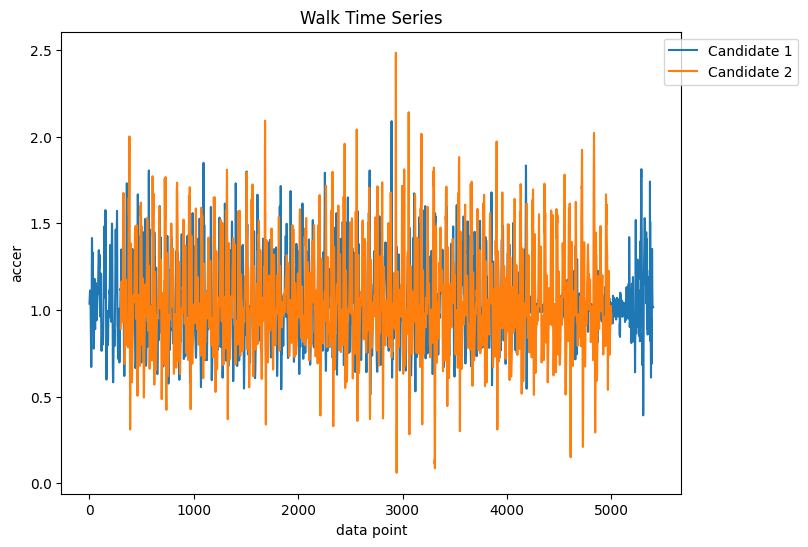

In [6]:
# Walk
plot_candidates('Walk Time Series', z_walk , 'Candidate 1', g_walk, 'Candidate 2')

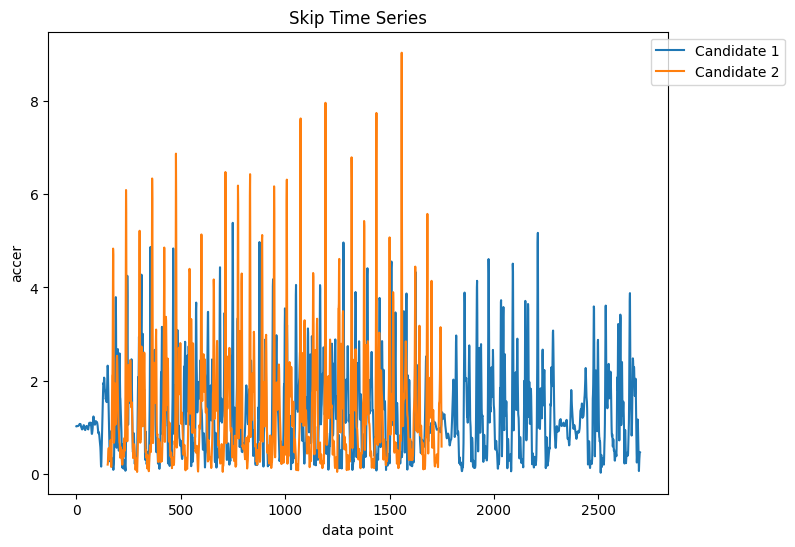

In [7]:
# skip
plot_candidates('Skip Time Series', z_skip , 'Candidate 1', g_skip, 'Candidate 2')

## Guess shapelet feature

<AxesSubplot: title={'center': 'Jump cycle'}>

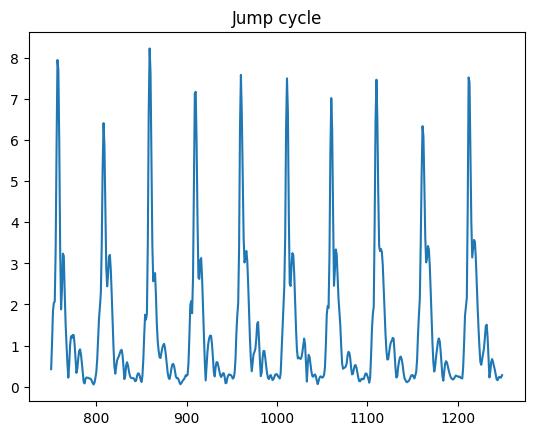

In [7]:
# Jump
z_jump[500: 1000].plot(title='Jump cycle')


<AxesSubplot: title={'center': 'walk cycle'}>

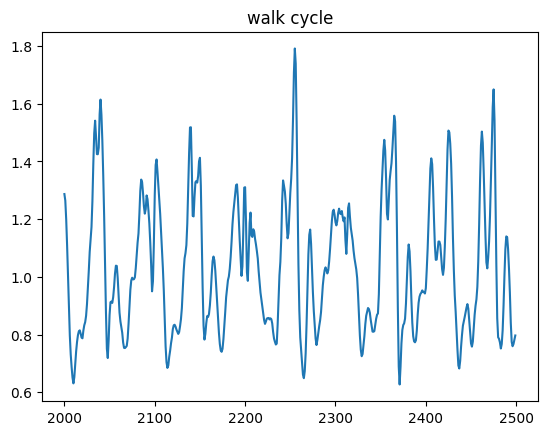

In [8]:
# Walk
z_walk[2000: 2500].plot(title='walk cycle')

<AxesSubplot: title={'center': 'skip cycle'}>

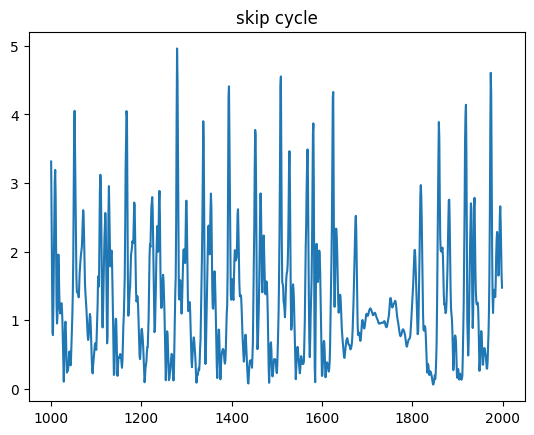

In [9]:
# Skip
z_skip[1000: 2000].plot(title='skip cycle')

<AxesSubplot: title={'center': 'Jump cycle'}>

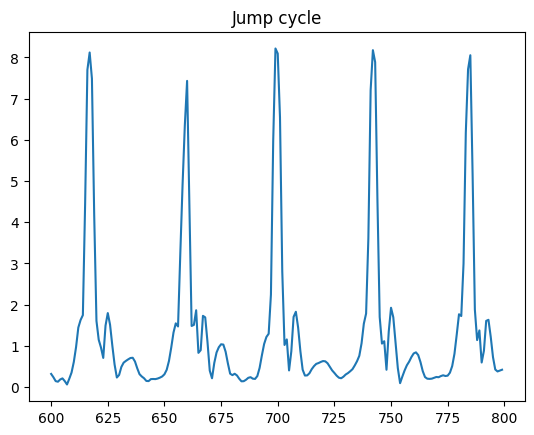

In [10]:
g_jump[500: 700].plot(title='Jump cycle')

<AxesSubplot: title={'center': 'walk cycle'}>

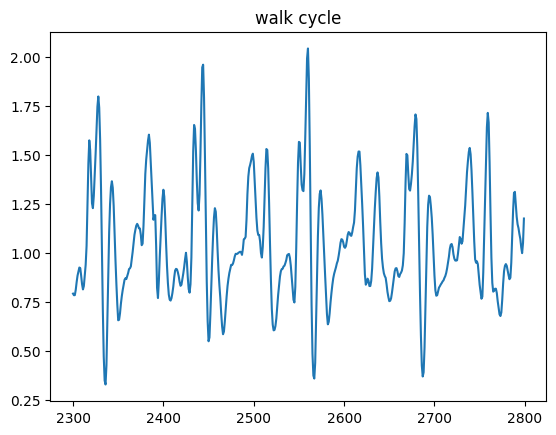

In [11]:
g_walk[2000: 2500].plot(title='walk cycle')

<AxesSubplot: title={'center': 'skip cycle'}>

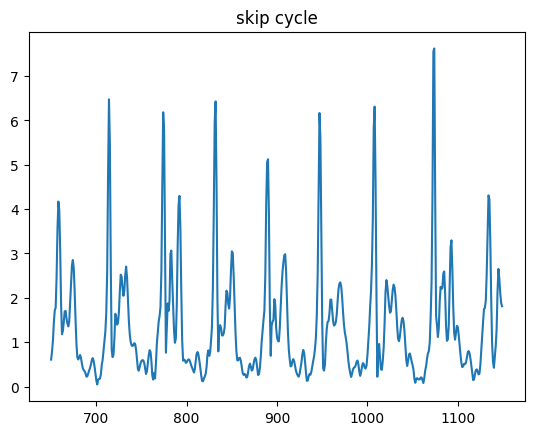

In [12]:
g_skip[500: 1000].plot(title='skip cycle')

## Extract Shapelets

In [10]:
def find_represt_shapelet(df_action, min_dist, thres, max_dist):
    """
    This is a method to find representative shapelet, and order the shapelet candidates

    :df_action: this is the vector dataframe of one action
    :min_dist: the minimum shapelet length
    :thres: percentage of the peak value
    :max_dist: the maximum shapelet length
    :return: shapelets[0], representative shapelet, and an ordered candidates list
    """
    action_shape = Shapelet(df_action)
    action_shape.series = action_shape.original
    # action_shape.smooth(3)
    action_shape.candidate_extraction(extraction='peak', min_dist=min_dist, thres=thres, max_dist=max_dist)
    # order the candidates shapelets
    action_shape.order_candidates(comparison='candidates')
    ordered_candidates = action_shape.candidates
    action_shape.shapelet_selection(barycenter='interpolated')
    rs_shapelet = action_shape.shapelets[0]
    return rs_shapelet, ordered_candidates

def plot_shapelets(rs, ordered_candidates_arr, title):
    """
    This is a method to extract all the candidates shapelets

    :rs: representative shapelet
    :ordered_candidates_arr: is an ordered candidates list
    :title: plot title
    """
    for i in range(len(ordered_candidates_arr)):
        if i < 5:
             color = 'green'
        else:
            color = 'black'
        plt.plot(ordered_candidates_arr[i], color = color)
    plt.title(title)
    plt.plot(rs, lw=8)



### Candidate 1

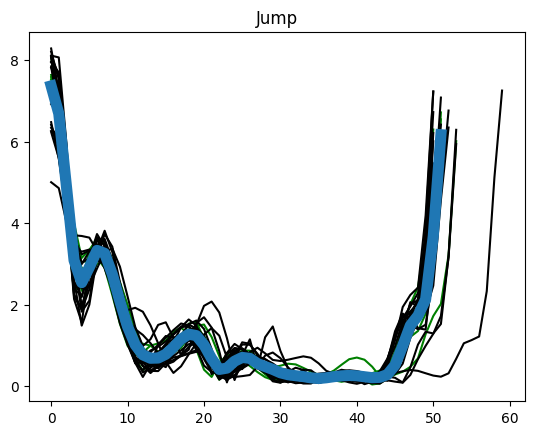

In [9]:
# Jump
z_jump_rs, z_jump_ordered_candidates = find_represt_shapelet(z_jump, min_dist=50, thres=0.9, max_dist=60)
plot_shapelets(z_jump_rs, z_jump_ordered_candidates, 'Jump')

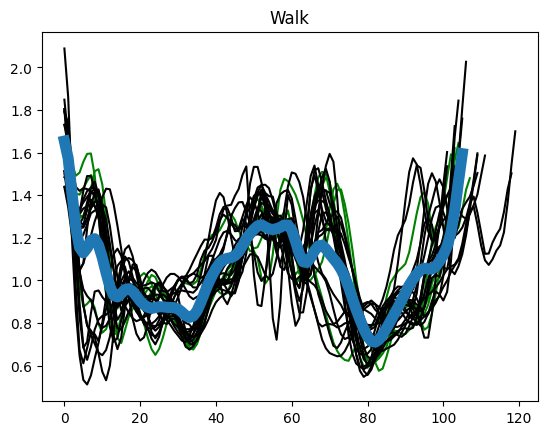

In [15]:
# Walk
z_walk_rs, z_walk_ordered_candidates = find_represt_shapelet(z_walk, min_dist=100, thres=0.95, max_dist=120)
plot_shapelets(z_walk_rs, z_walk_ordered_candidates, 'Walk')

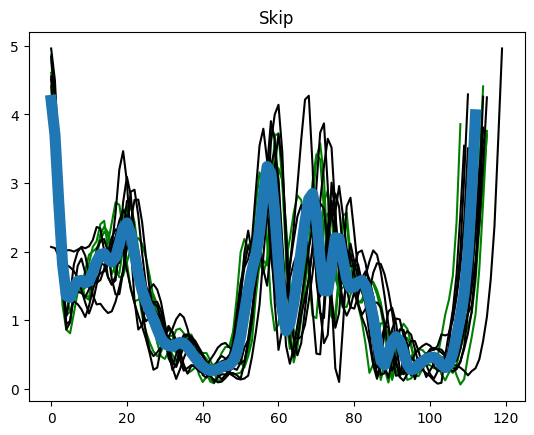

In [16]:
# Skip
z_skip_rs, z_skip_ordered_candidates = find_represt_shapelet(z_skip, min_dist=100, thres=0.8, max_dist=120)
plot_shapelets(z_skip_rs, z_skip_ordered_candidates, 'Skip')

### Candidate 2

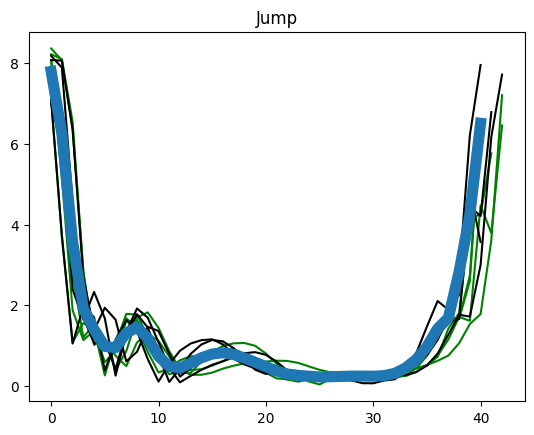

In [17]:
# Jump
g_jump_rs, g_jump_ordered_candidates = find_represt_shapelet(g_jump, min_dist=40, thres=0.9, max_dist=60)
plot_shapelets(g_jump_rs, g_jump_ordered_candidates, 'Jump')

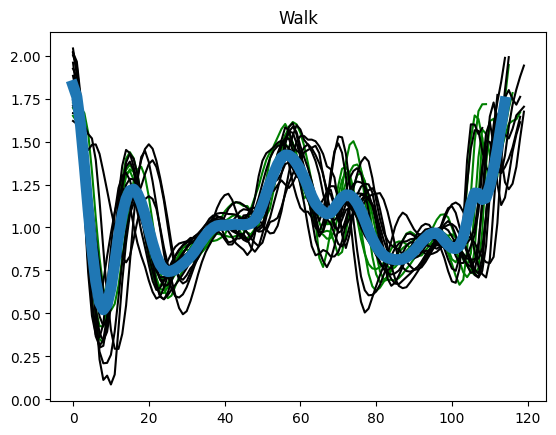

In [18]:
# Walk
g_walk_rs, g_walk_ordered_candidates = find_represt_shapelet(g_walk, min_dist=100, thres=0.95, max_dist=120)
plot_shapelets(g_walk_rs, g_walk_ordered_candidates, 'Walk')

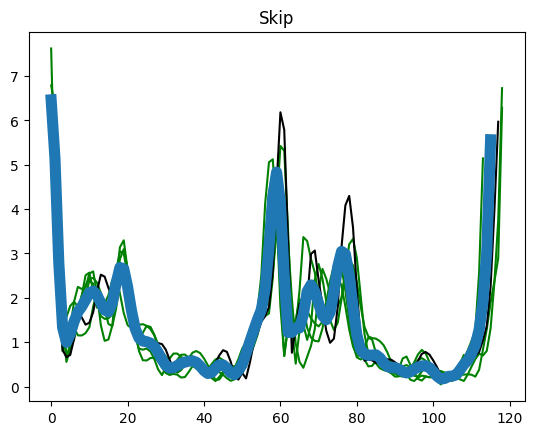

In [19]:
# Skip
g_skip_rs, g_skip_ordered_candidates = find_represt_shapelet(g_skip, min_dist=100, thres=0.8, max_dist=120)
plot_shapelets(g_skip_rs, g_skip_ordered_candidates, 'Skip')

## Store representative shapelets and top candidates

In [20]:
# Use %store to store the variable
%store z_jump_rs
%store z_walk_rs
%store z_skip_rs

%store z_jump_ordered_candidates
%store z_walk_ordered_candidates
%store z_skip_ordered_candidates

%store z_jump
%store z_walk
%store z_skip

Stored 'z_jump_rs' (ndarray)
Stored 'z_walk_rs' (ndarray)
Stored 'z_skip_rs' (ndarray)
Stored 'z_jump_ordered_candidates' (list)
Stored 'z_walk_ordered_candidates' (list)
Stored 'z_skip_ordered_candidates' (list)
Stored 'z_jump' (Series)
Stored 'z_walk' (Series)
Stored 'z_skip' (Series)


In [21]:
# Use %store to store the variable
%store g_jump_rs
%store g_walk_rs
%store g_skip_rs

%store g_jump_ordered_candidates
%store g_walk_ordered_candidates
%store g_skip_ordered_candidates

%store g_jump
%store g_walk
%store g_skip

Stored 'g_jump_rs' (ndarray)
Stored 'g_walk_rs' (ndarray)
Stored 'g_skip_rs' (ndarray)
Stored 'g_jump_ordered_candidates' (list)
Stored 'g_walk_ordered_candidates' (list)
Stored 'g_skip_ordered_candidates' (list)
Stored 'g_jump' (Series)
Stored 'g_walk' (Series)
Stored 'g_skip' (Series)
